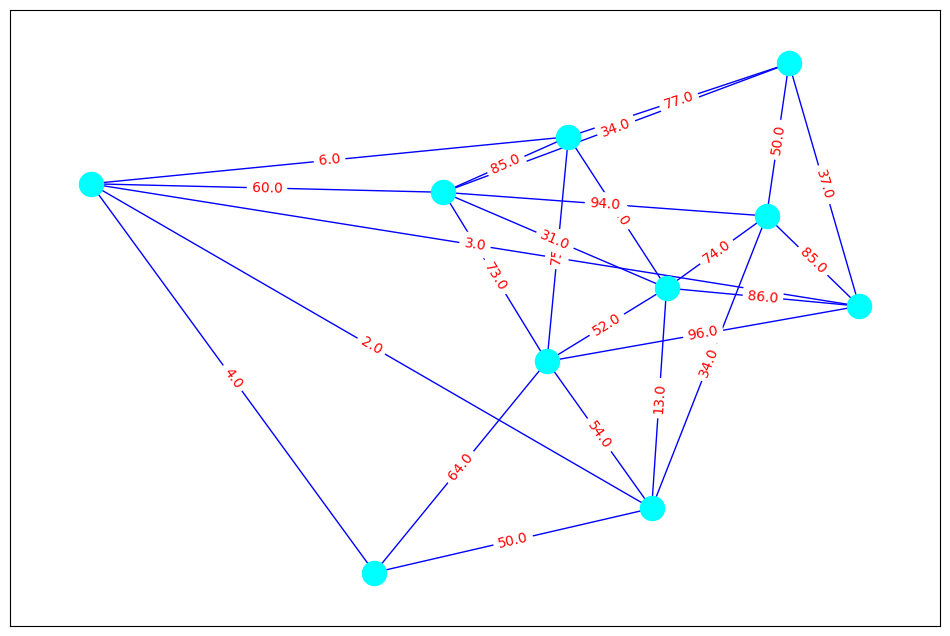

[0, 3] 2.0
[0, 8] 3.0
[0, 7] 4.0
[0, 2] 6.0
[3, 9] 13.0
[9, 4] 31.0
[3, 6] 34.0
[4, 5] 34.0
[9, 1] 52.0
[-1, -1] inf


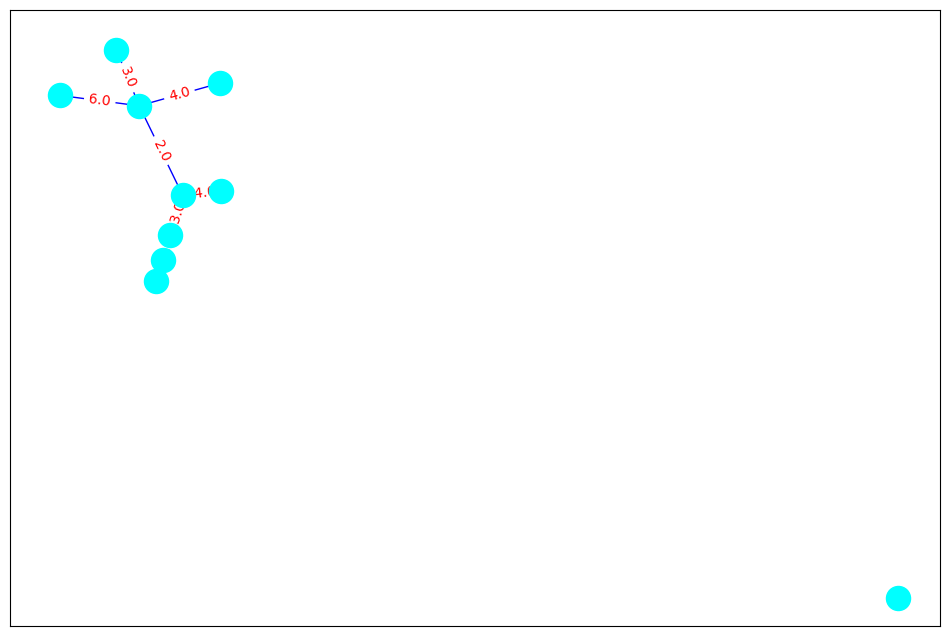

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def initialize_graph(num_nodes):
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if np.random.randint(0, 2) == 1:
                weight = np.random.randint(0, 100)
                adjacency_matrix[i][j] = adjacency_matrix[j][i] = weight
    return adjacency_matrix

def matrix_to_graph(matrix):
    G = nx.Graph()
    for i in range(matrix.shape[0]):
        for j in range(i+1, matrix.shape[1]):
            if matrix[i][j] != 0:
                G.add_edge(i, j, weight=matrix[i][j])
    return G

def visualize_graph(graph):
    plt.figure(figsize=(12, 8))
    layout = nx.spring_layout(graph, seed=7)
    nx.draw_networkx_nodes(graph, layout, node_color="cyan")
    nx.draw_networkx_edges(graph, layout, edge_color="blue")
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, layout, edge_labels, font_color="red")
    plt.show()

def find_nearest_node(adjacency_matrix, visited_nodes):
    best_pair = [-1, -1]
    min_weight = float('inf')
    for node in visited_nodes:
        for neighbour_index in range(len(adjacency_matrix[node])):
            if adjacency_matrix[node][neighbour_index] == 0:
                continue
            if adjacency_matrix[node][neighbour_index] < min_weight:
                min_weight = adjacency_matrix[node][neighbour_index]
                best_pair = [node, neighbour_index]

    for node in visited_nodes:
        adjacency_matrix[node][best_pair[1]] = adjacency_matrix[best_pair[1]][node] = 0
    return best_pair, min_weight

num_nodes = 10
original_matrix = initialize_graph(num_nodes)
working_matrix = np.copy(original_matrix)
graph = matrix_to_graph(working_matrix)
visualize_graph(graph)

minimum_spanning_tree = nx.Graph()
visited = [0]
unvisited = list(range(num_nodes))

while unvisited:
    nearest_pair, min_distance = find_nearest_node(working_matrix, visited)
    print(nearest_pair, min_distance)
    if nearest_pair[0] == -1:
        break
    new_node = nearest_pair[1]
    visited.append(new_node)
    unvisited.remove(new_node)
    minimum_spanning_tree.add_edge(*nearest_pair, weight=min_distance)

visualize_graph(minimum_spanning_tree)

heaviest_edge = max(minimum_spanning_tree.edges(data=True), key=lambda x: x[2]['weight'])
minimum_spanning_tree.remove_edge(*heaviest_edge[:2])
visualize_graph(minimum_spanning_tree)
